<a href="https://colab.research.google.com/github/Tydos/Interpretable-ML-Models/blob/main/Linear%20Regression/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression

This notebook implements linear regression using the popular diabetes dataset used for regression

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

In [42]:
X = load_diabetes().data
y = load_diabetes().target
cols = load_diabetes().feature_names

print(X[1],y[1],cols)

[-0.00188202 -0.04464164 -0.05147406 -0.02632753 -0.00844872 -0.01916334
  0.07441156 -0.03949338 -0.06833155 -0.09220405] 75.0 ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [43]:
X_train, X_test, ytrain, y_test = train_test_split(X,y,test_size=0.2)
print(len(X_train))
print(len(X_test))

353
89


We have to predict y = w*x+b

10 features -> 10 weights, 10 biases

### Closed form solution

Closed-form solutions are best suited for problems with a small number of features. The dominant computational cost comes from inverting the feature covariance matrix, which has o(n^3) complexity in the number of features and therefore does not scale well to high-dimensional datasets.

In [44]:
#closed form solution - this one passes through origin
def normal_equation(X, y):
    return np.linalg.inv(X.T @ X) @ X.T @ y

def normal_bias_equation(X,y):
  #add bias using numpy column concat function
  len_features = X.shape[0]
  bias = np.ones((len_features,1)) #create matrix of size 1*n
  X_b = np.c_[bias,X]

  theta = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y
  return theta

def lstsq_normal(X,y):
  len_features = X.shape[0]
  bias = np.ones((len_features,1)) #create matrix of size 1*n
  X_b = np.c_[bias,X]

  return np.linalg.lstsq(X_b,y,rcond=None)


In [45]:
w = normal_equation(X_train,ytrain)
for i, col in enumerate(cols):
  print(f"{col}: {w[i]}")

age: -110.99945946104417
sex: -290.1338478628836
bmi: 687.4650977590578
bp: 328.36154616468957
s1: -98.0539013642001
s2: -121.69548858960414
s3: -279.44651757842405
s4: 177.9474491132182
s5: 343.0802661552123
s6: 129.75643392421497


In [60]:
w = normal_bias_equation(X_train,ytrain)
print(w)
for i, col in enumerate(cols):
  print(f"{col}: {w[i]}")


[ 150.88647755  -11.61497375 -268.29146279  559.69376371  322.53768282
 -795.60655188  529.01812587   -5.01124071   83.45285492  745.74283664
   66.85271858]
age: 150.886477546406
sex: -11.614973753908348
bmi: -268.2914627903197
bp: 559.6937637079471
s1: 322.53768281570746
s2: -795.6065518803949
s3: 529.0181258697506
s4: -5.011240705631437
s5: 83.45285492153673
s6: 745.7428366357053


In [47]:
w, residual, rank, s = lstsq_normal(X_train,ytrain)
for i, col in enumerate(cols):
  print(f"{col}: {w[i]}")

print(residual)
print(rank)
print(s)


age: 150.8864775464063
sex: -11.614973753907407
bmi: -268.2914627903211
bp: 559.6937637079475
s1: 322.5376828157084
s2: -795.6065518804172
s3: 529.0181258697661
s4: -5.011240705624999
s5: 83.45285492153526
s6: 745.7428366357135
[987986.17653948]
11
[18.78835786  1.84152442  1.07196855  0.98381213  0.88031279  0.72218106
  0.6937155   0.6512574   0.57471556  0.24602768  0.08602669]


### Gradient descent solution


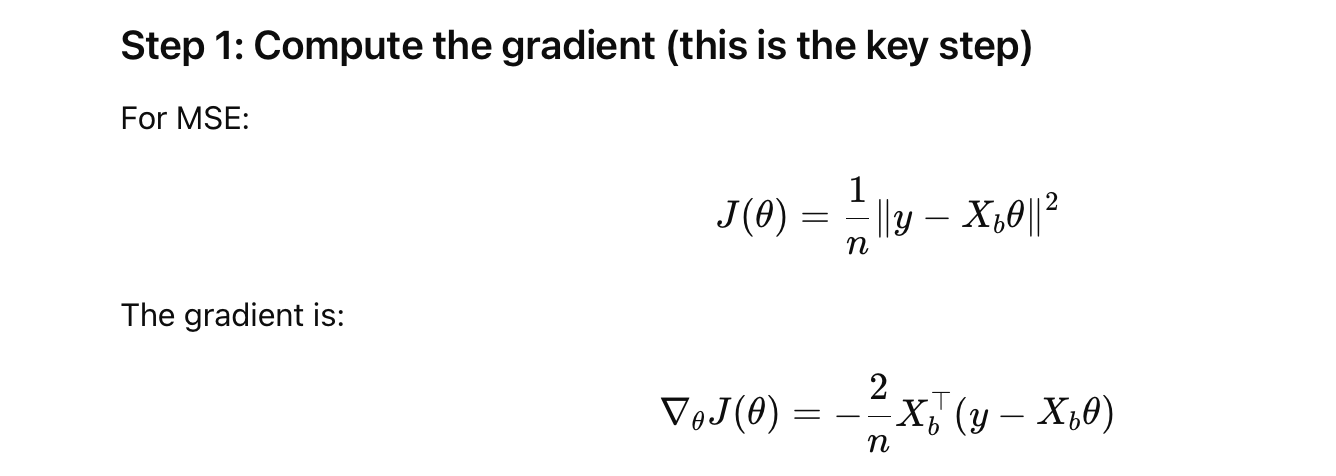

#### Bias

In [52]:
#TODO
def add_bias(X):
    n_samples = X.shape[0]
    return np.hstack((np.ones((n_samples, 1)), X))

X_b = add_bias(X_train)
print(X_b[0])

print(X_train.shape)
print(X_b.shape)
print(ytrain.shape)
print(y_test.shape)

[ 1.         -0.06363517  0.05068012  0.09618619  0.10450081 -0.00294491
 -0.00475851 -0.00658447 -0.00259226  0.02268774  0.07348023]
(353, 10)
(353, 11)
(353,)
(89,)


#### Mean Squared Error Loss

In [38]:
#create a weight vector so that i can do wTx
weight_vector = np.ones(X_b.shape[1])
print(weight_vector)

def mse_loss(X_b,y,w):
  Y_hat = X_b @ weight_vector
  return np.mean((y-Y_hat)**2)

loss = mse_loss(X_b,ytrain,weight_vector)
print(weight_vector)
print(loss)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
29265.550675210212


#### Gradient Descent

w <- w - learning_rate*gradient

In [54]:
def gradient(X_b,y,w):
    n = len(y)
    return -(2 / n) * X_b.T @ (y - X_b @ w)

gradient(X_b,ytrain,weight_vector)

array([-3.02039348e+02, -1.16861020e+00, -1.53363412e-01, -5.12060246e+00,
       -3.38492261e+00, -1.62210219e+00, -1.45319033e+00,  3.34979976e+00,
       -3.67143287e+00, -4.13538458e+00, -3.26090969e+00])

epoch - 0 : Loss -28023.37595474667
epoch - 1 : Loss -27155.02808692174
epoch - 2 : Loss -26321.032354378625
epoch - 3 : Loss -25520.028415358775
epoch - 4 : Loss -24750.70979799402
epoch - 5 : Loss -24011.821767044654
epoch - 6 : Loss -23302.159275115177
epoch - 7 : Loss -22620.56499500249
epoch - 8 : Loss -21965.927429963605
epoch - 9 : Loss -21337.179098817247
epoch - 10 : Loss -20733.29479291595
epoch - 11 : Loss -20153.289902142453
epoch - 12 : Loss -19596.21880719718
epoch - 13 : Loss -19061.173335551444
epoch - 14 : Loss -18547.281278545437
epoch - 15 : Loss -18053.70496720945
epoch - 16 : Loss -17579.639904482963
epoch - 17 : Loss -17124.313451598253
epoch - 18 : Loss -16686.983566483545
epoch - 19 : Loss -16266.937592125707
epoch - 20 : Loss -15863.491092914148
epoch - 21 : Loss -15475.98673706578
epoch - 22 : Loss -15103.793223306246
epoch - 23 : Loss -14746.30425005488
epoch - 24 : Loss -14402.937525430185
epoch - 25 : Loss -14073.133816459373
epoch - 26 : Loss -13756.356035

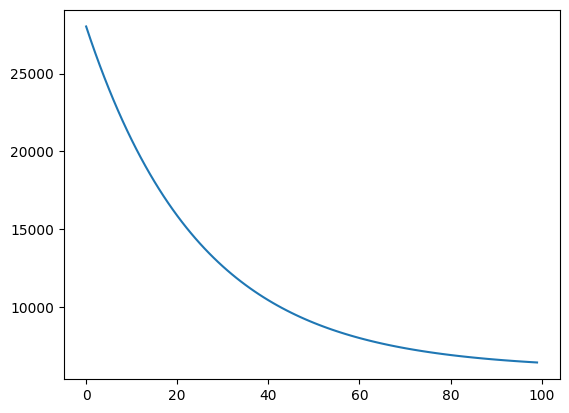

In [59]:
learning_rate = 0.01
epochs = 100
loss_history = {}

#initialize weight vector
weight_vector = np.ones(X_b.shape[1])
for epoch in range(epochs):
  #find gradient for the current set of weights
  grad = gradient(X_b,ytrain,weight_vector)

  #update weights using the gradient descent algorithm
  weight_vector -= learning_rate * grad

  #find out the loss of the model
  loss = mse_loss(X_b,ytrain,weight_vector)
  print(f"epoch - {epoch} : Loss -{loss}")

  loss_history[epoch] = loss

print(weight_vector)
plt.plot(loss_history.keys(),loss_history.values())

### Analysis

Closed Form Solution - [ 150.88647755  -11.61497375 -268.29146279  559.69376371  322.53768282
 -795.60655188  529.01812587   -5.01124071   83.45285492  745.74283664
   66.85271858]


Gradient Descent Solution - [131.98416514   2.36476678   1.15594451   5.80977315   4.33169799
   2.66622582   2.45844696  -2.15647581   4.5045422    5.15368472
   4.09745983]


### Assumptions of Linear Regression


---
### 1. Linearity (in parameters)
**Intuition:**  
Each feature contributes additively and proportionally to the prediction.

**Violation symptoms:**  
- Residuals vs. predicted values show curved patterns  
- Systematic under- or over-prediction in certain ranges  

**Fixes:**  
- Add polynomial or interaction terms  
- Transform features (log, square root, etc.)  
- Use a non-linear model if necessary  
---

### 3. Homoscedasticity (constant error variance)
**Intuition:**  
The model should be equally confident across all prediction ranges.

**Violation symptoms:**  
- Residual plot shows a fan or cone shape  
- Errors increase with the magnitude of predictions  

**Fixes:**  
- Transform the target variable (log, Box–Cox)  
- Use weighted least squares  
- Apply heteroscedasticity-robust standard errors  

---

### 4. Normality of errors (mainly for inference)
**Intuition:**  
Normally distributed errors allow reliable confidence intervals and hypothesis tests.

**Violation symptoms:**  
- Skewed or heavy-tailed residual distribution  
- Strong deviations from the diagonal in a Q–Q plot  

**Fixes:**  
- Transform the target variable  
- Use bootstrapping methods  
- Often ignorable for prediction with large sample sizes  

---

### 5. No (or low) multicollinearity
**Intuition:**  
Each feature should explain unique information about the target.

**Violation symptoms:**  
- Large standard errors for coefficients  
- Unstable coefficients or unexpected sign changes  
- High Variance Inflation Factor (VIF)  

**Fixes:**  
- Remove or combine correlated features  
- Apply dimensionality reduction (e.g., PCA)  
- Use regularization techniques (Ridge, Lasso)  



# Data Analysis

### Feature–Target Linearity Diagnostics

This visualization assesses the **linearity assumption** of linear regression by plotting each feature against the target variable with an overlaid linear fit.

#### Method
- Each subplot displays one feature versus the target.
- A scatter plot shows the raw relationship.
- A fitted linear regression line highlights the linear trend.

#### Interpretation
- **Approximately straight trend** → Linear relationship is plausible.
- **Clear curvature** → Indicates non-linearity; consider transformations or polynomial terms.
- **Flat or noisy pattern** → Feature may have weak explanatory power.
- **Uneven spread of points** → May suggest heteroscedasticity.

#### Purpose
These plots provide a **feature-level diagnostic** to identify non-linear relationships before or during model specification and complement residual-based diagnostics.


In [ ]:
#for each feature, plot feature vs target to check for linearity
df = pd.DataFrame(X,columns=cols)
df['target'] = y

fig, axes = plt.subplots(5, 2, figsize=(10, 12))
axes = axes.flatten()

for i, col in enumerate(cols):
  plt.subplot(5,2,i+1)
  sns.regplot(x=df[col],y=df['target'],ax=axes[i],scatter_kws={'alpha':0.5},line_kws={'color':'red'})

plt.show()


### Residual Diagnostics: Linearity and Homoscedasticity

This code fits a linear regression model and evaluates key assumptions using a **residuals vs. predicted values** plot.

- **Linearity**  
  Residuals should be randomly scattered around zero with no systematic pattern. Curvature or structure suggests non-linear relationships or missing terms.

- **Homoscedasticity**  
  The spread of residuals should remain approximately constant across all predicted values. A funnel or cone shape indicates heteroscedasticity.

**Desired outcome:**  
A horizontal band of points centered at zero with uniform spread across the x-axis.

This plot serves as an initial diagnostic; additional feature-level residual plots and formal statistical tests may be used for confirmation.


In [ ]:
#check residual plots for linearity, homoscedascity
lr = LinearRegression()
lr.fit(X_train, ytrain)

y_pred = lr.predict(X_test)
residuals = y_test - y_pred

plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(0, color='red')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted')
plt.show()


### Statistical Testing

#### Ramsey RESET Test

**Purpose**  
Tests whether non-linear combinations of the fitted values add explanatory power to the model.

**Hypotheses**  
- **H₀**: The model is correctly specified (linear)
- **H₁**: The model is misspecified (non-linear terms are missing)

**Interpretation**  
- **p-value < 0.05** → Evidence of non-linearity  
- **p-value ≥ 0.05** → Linearity assumption is plausible


In [ ]:
#Ramsey Reset
import statsmodels.api as sm
from statsmodels.stats.diagnostic import linear_reset

X_ = sm.add_constant(X_train)
model = sm.OLS(ytrain, X_).fit()

reset = linear_reset(model, power=2, use_f=True)
print(reset)



#### Breusch–Pagan Test
**Purpose:**  
Tests whether residual variance depends on the predictors.

**Hypotheses:**  
- **H₀:** Residuals are homoscedastic  
- **H₁:** Residuals are heteroscedastic

**Decision Rule:**  
- *p-value < 0.05* → Evidence of heteroscedasticity  
- *p-value ≥ 0.05* → Homoscedasticity plausible


In [ ]:
from statsmodels.stats.diagnostic import het_breuschpagan

X_ = sm.add_constant(X_train)
model = sm.OLS(ytrain, X_).fit()

bp_test = het_breuschpagan(model.resid, model.model.exog)

print(bp_test)

In [ ]:

labels = ['LM Statistic', 'LM p-value', 'F-Statistic', 'F p-value']
bp_results = dict(zip(labels, bp_test))
print(bp_results)

#### Shapiro–Wilk Test
**Purpose:**  
Tests whether residuals follow a normal distribution.

**Hypotheses:**  
- **H₀:** Residuals are normally distributed  
- **H₁:** Residuals are not normally distributed

**Decision Rule:**  
- *p-value < 0.05* → Normality violated  


In [ ]:
from scipy.stats import shapiro
X_ = sm.add_constant(X_train)
model = sm.OLS(ytrain, X_).fit()
residuals = model.resid
stat, p_value = shapiro(residuals)

print(f"SW Statistic: {stat:.4f}, p-value: {p_value:.4f}")


#### Variance Inflation Factor (VIF)
**Purpose:**  
Measures how strongly a predictor is linearly related to other predictors.

**Rule of Thumb:**  
- VIF > 5 → Moderate multicollinearity  
- VIF > 10 → Severe multicollinearity



In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
dfX = pd.DataFrame(X,columns=cols)
X_ = sm.add_constant(dfX)

vif_data = pd.DataFrame()
vif_data['feature'] = X_.columns
vif_data['VIF'] = [variance_inflation_factor(X_.values, i)
                   for i in range(X_.shape[1])]

print(vif_data)

# Model Interpretablility